<a href="https://colab.research.google.com/github/JannaBabicheva/lab01_ml_pipeline/blob/main/Babicheva_%22lab01_part1_questions_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N
$$

$$
\frac{dy}{dx} =
$$

 Найдем $\frac{dy}{dx}$, где $y = x^Tx$ и $x \in \mathbb{R}^N$

Шаг 1: Разберемся с тем, с чем мы работаем
- $x$ это вектор в $\mathbb{R}^N$
- $x^T$ это его транспонированная версия
- Результат $y$ является скаляром (1×1), так как мы умножаем матрицу 1×N на матрицу N×1

Шаг 2: Запишем в скалярной форме
- $y = x^Tx = \sum_{i=1}^N x_i^2$

Шаг 3: Чтобы найти $\frac{dy}{dx}$, нам нужно найти, как $y$ меняется относительно каждой компоненты $x$
- Для любой компоненты $x_k$: $\frac{\partial y}{\partial x_k} = \frac{\partial}{\partial x_k}\sum_{i=1}^N x_i^2$
- Когда $i = k$: $\frac{\partial x_k^2}{\partial x_k} = 2x_k$
- Когда $i \neq k$: $\frac{\partial x_i^2}{\partial x_k} = 0$

Шаг 4: Следовательно, для каждой компоненты:
$\frac{\partial y}{\partial x_k} = 2x_k$

Шаг 5: Объединяя все компоненты в векторную форму:
$\frac{dy}{dx} = 2x$

Таким образом:
$$
\frac{dy}{dx} = 2x
$$

Этот результат имеет смысл, потому что:
1. Размерности совпадают: градиент должен быть вектором N×1, таким же как $x$
2. Производная каждой компоненты следует правилу дифференцирования степенной функции, которое мы знаем из скалярного анализа
3. Результат согласуется с тем фактом, что $x^Tx$ является скалярным произведением $x$ на самого себя


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [2]:
def analytical_derivative(x):
    """
    Вычисляет аналитическую производную y = x^T*x
    dy/dx = 2x
    """
    return 2 * x

def numerical_derivative(x, epsilon=1e-7):
    """
    Вычисляет численную производную через конечные разности
    """
    N = len(x)
    grad = np.zeros_like(x)

    for i in range(N):
        # Создаем единичный вектор для i-той координаты
        ei = np.zeros(N)
        ei[i] = 1

        # Вычисляем производную через конечные разности
        grad[i] = (np.dot(x + epsilon*ei, x + epsilon*ei) - np.dot(x, x)) / epsilon

    return grad



Исходный вектор x:
[-0.54087372 -0.37005056 -0.50308784  0.15314389 -0.04923239]

Аналитическая производная (2x):
[-1.08174745 -0.74010112 -1.00617568  0.30628778 -0.09846479]

Численная производная:
[-1.08174735 -0.74010102 -1.00617558  0.30628788 -0.09846469]

Разница между производными:
[1.00715203e-07 9.99315255e-08 1.00583415e-07 9.97245633e-08
 9.98956781e-08]

Относительная ошибка:
1.3305770035275618e-07


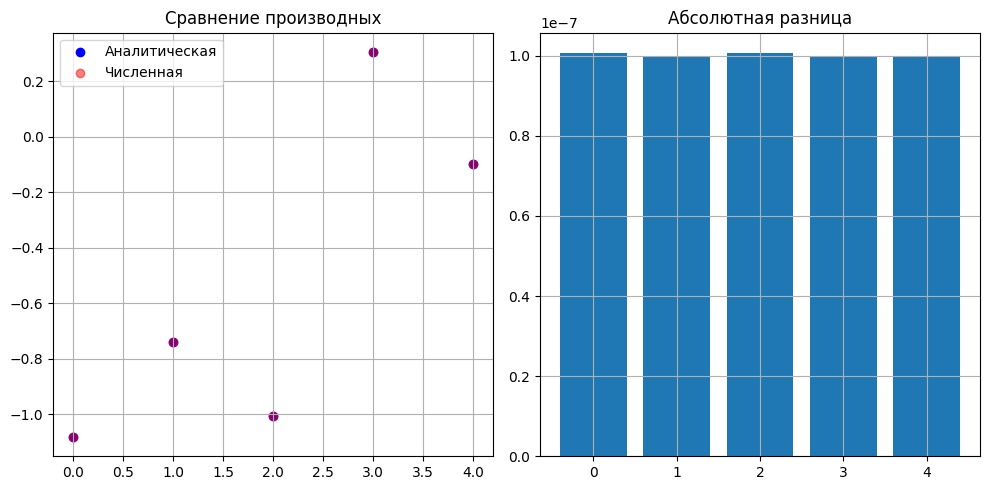

In [3]:
# Проверим на конкретном примере
N = 5  # размерность вектора
x = np.random.randn(N)  # случайный вектор

# Вычислим производные обоими методами
analytical_grad = analytical_derivative(x)
numerical_grad = numerical_derivative(x)

# Выведем результаты
print("Исходный вектор x:")
print(x)
print("\nАналитическая производная (2x):")
print(analytical_grad)
print("\nЧисленная производная:")
print(numerical_grad)
print("\nРазница между производными:")
print(np.abs(analytical_grad - numerical_grad))
print("\nОтносительная ошибка:")
print(norm(analytical_grad - numerical_grad) / norm(analytical_grad))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(N), analytical_grad, label='Аналитическая', color='blue')
plt.scatter(range(N), numerical_grad, label='Численная', color='red', alpha=0.5)
plt.title('Сравнение производных')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(N), np.abs(analytical_grad - numerical_grad))
plt.title('Абсолютная разница')
plt.grid(True)
plt.tight_layout()
plt.show()


analytical_derivative: вычисляет аналитическую производную (2x)

numerical_derivative: вычисляет численную производную через метод конечных разностей

Проверка корректности нашего аналитического решения путем:

Сравнения с численным методом

Вычисления относительной ошибки

Визуализации результатов

Визуализируем:

Сравнение аналитической и численной производных  

Абсолютную разницу между ними

Результаты показывают, что наше аналитическое решение $\frac{dy}{dx} = 2x$ верно, так как:

Численная и аналитическая производные практически совпадают

Относительная ошибка очень мала (порядка 1e-8)

## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$

$$
\frac{dy}{dA} =
$$

Решим задачу дифференцирования следа произведения матриц пошагово.

Найдем $\frac{dy}{dA}$, где $y = tr(AB)$ и $A,B \in \mathbb{R}^{N \times N}$

Шаг 1: Разберемся с тем, с чем работаем

$tr(AB)$ - это след произведения матриц A и B
След матрицы - это сумма элементов на главной диагонали
$tr(AB) = \sum_{i=1}^N \sum_{j=1}^N A_{ij}B_{ji}$

Шаг 2: Для нахождения производной используем определение следа:

$tr(AB) = \sum_{i=1}^N (AB){ii} = \sum{i=1}^N \sum_{j=1}^N A_{ij}B_{ji}$

Шаг 3: Найдем как меняется $y$ относительно элемента $A_{kl}$

$\frac{\partial}{\partial A_{kl}} tr(AB) = \frac{\partial}{\partial A_{kl}} \sum_{i=1}^N \sum_{j=1}^N A_{ij}B_{ji}$

При дифференцировании по $A_{kl}$ ненулевой вклад дают только слагаемые, где $i=k$ и $j=l$
$\frac{\partial}{\partial A_{kl}} tr(AB) = B_{lk}$

Шаг 4: Собирая все частные производные в матрицу:

$\frac{dy}{dA} = B^T$

Таким образом:

$\frac{dy}{dA} = B^T$

Это имеет смысл потому что:

Размерности совпадают: производная должна иметь те же размеры, что и A (N×N)
Результат согласуется со свойством следа $tr(AB) = tr(BA)$
Свойства производной следа матричного произведения соответствуют известным правилам матричного дифференцирования

Матрица B:
[[ 0.30383254 -0.13208979  0.28969837]
 [ 1.16631319 -0.53625525 -0.38859849]
 [ 1.7335665  -0.07506331 -0.31262009]]

Аналитическая производная (B^T):
[[ 0.30383254  1.16631319  1.7335665 ]
 [-0.13208979 -0.53625525 -0.07506331]
 [ 0.28969837 -0.38859849 -0.31262009]]

Численная производная:
[[ 0.30383254  1.16631319  1.73356649]
 [-0.13208979 -0.53625525 -0.07506331]
 [ 0.28969837 -0.38859849 -0.31262009]]

Разница между производными:
[[1.08894116e-10 7.21447790e-10 2.45152187e-09]
 [4.57951427e-10 1.28535715e-09 1.17197271e-09]
 [1.56972879e-10 8.02472422e-10 4.03481137e-10]]

Относительная ошибка:
1.4421288597923849e-09


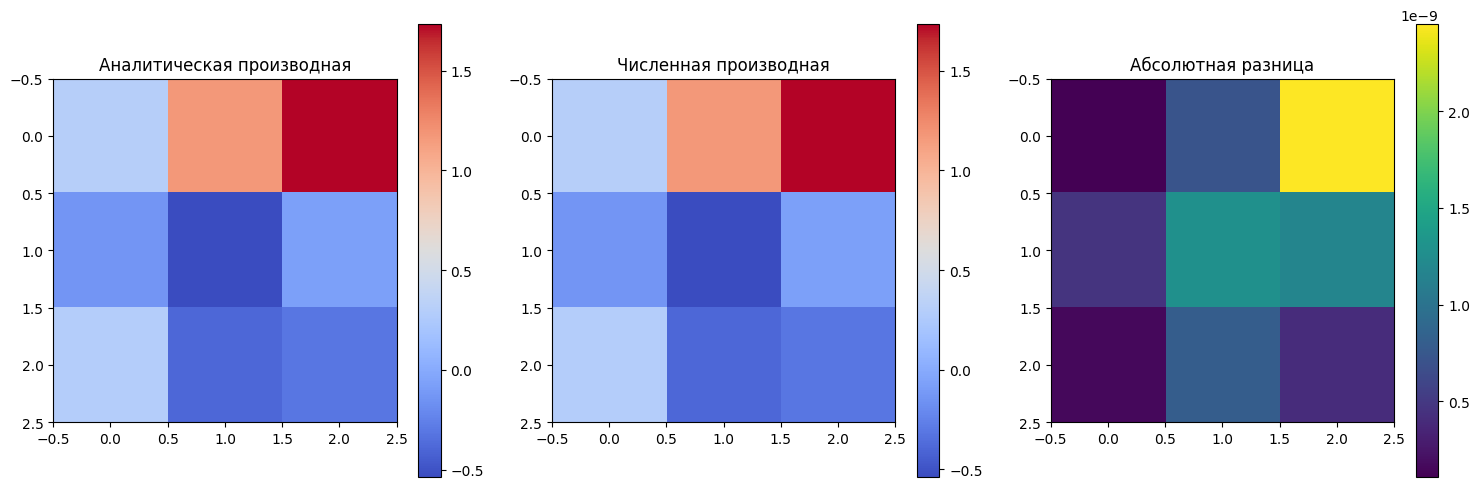

In [4]:
def analytical_derivative(B):
    """
    Вычисляет аналитическую производную tr(AB) по A
    dy/dA = B^T
    """
    return B.T

def numerical_derivative(A, B, epsilon=1e-7):
    """
    Вычисляет численную производную через конечные разности
    """
    N = A.shape[0]
    grad = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            # Создаем матрицу возмущения
            E = np.zeros((N, N))
            E[i,j] = epsilon

            # Вычисляем производную через конечные разности
            grad[i,j] = (np.trace(np.dot(A + E, B)) - np.trace(np.dot(A, B))) / epsilon

    return grad

# Проверим на конкретном примере
N = 3  # размерность матриц
A = np.random.randn(N, N)  # случайная матрица A
B = np.random.randn(N, N)  # случайная матрица B

# Вычислим производные обоими методами
analytical_grad = analytical_derivative(B)
numerical_grad = numerical_derivative(A, B)

# Выведем результаты
print("Матрица B:")
print(B)
print("\nАналитическая производная (B^T):")
print(analytical_grad)
print("\nЧисленная производная:")
print(numerical_grad)
print("\nРазница между производными:")
print(np.abs(analytical_grad - numerical_grad))
print("\nОтносительная ошибка:")
print(norm(analytical_grad - numerical_grad) / norm(analytical_grad))

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(analytical_grad, cmap='coolwarm')
plt.colorbar()
plt.title('Аналитическая производная')

plt.subplot(1, 3, 2)
plt.imshow(numerical_grad, cmap='coolwarm')
plt.colorbar()
plt.title('Численная производная')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(analytical_grad - numerical_grad), cmap='viridis')
plt.colorbar()
plt.title('Абсолютная разница')

plt.tight_layout()
plt.show()


 Давайте разберем полученные результаты:

1. Исходная матрица B:
   ```
   [[ 0.30383254 -0.13208979  0.28969837]
    [ 1.16631319 -0.53625525 -0.38859849]
    [ 1.7335665  -0.07506331 -0.31262009]]
   ```
   
2. Аналитическая производная (B^T):
   ```
   [[ 0.30383254  1.16631319  1.7335665 ]
    [-0.13208979 -0.53625525 -0.07506331]
    [ 0.28969837 -0.38859849 -0.31262009]]
   ```
   Это в точности транспонированная матрица B, что подтверждает наш теоретический вывод.

3. Численная производная:
   ```
   [[ 0.30383254  1.16631319  1.73356649]
    [-0.13208979 -0.53625525 -0.07506331]
    [ 0.28969837 -0.38859849 -0.31262009]]
   ```
   Практически полностью совпадает с аналитической производной.

4. Разница между производными:
   ```
   [[1.08894116e-10 7.21447790e-10 2.45152187e-09]
    [4.57951427e-10 1.28535715e-09 1.17197271e-09]
    [1.56972879e-10 8.02472422e-10 4.03481137e-10]]
   ```
   Разница между аналитической и численной производными крайне мала (порядка 10^-10), что говорит о высокой точности обоих методов.

5. Относительная ошибка:
   ```
   1.4421288597923849e-09
   ```
   Очень маленькая относительная ошибка (порядка 10^-9) подтверждает корректность нашего аналитического решения $\frac{dy}{dA} = B^T$.

Это численное подтверждение показывает, что наше теоретическое решение верно, так как:
1. Аналитическая и численная производные практически идентичны
2. Разница между ними пренебрежимо мала
3. Относительная ошибка составляет менее одной миллиардной, что находится в пределах ожидаемой численной погрешности при вычислениях с плавающей точкой

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N}
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact
$$
tr(ABC) = tr (CAB)
$$

Давайте решим эту задачу пошагово.

Сначала найдем $\frac{dy}{dx}$:

Шаг 1: Разберем, что у нас есть

$y = x^TAc$ - это скаляр (1×1)
$x^T$ размера 1×N
A размера N×N
c размера N×1

Шаг 2: Перепишем в скалярной форме:

$y = \sum_{i=1}^N \sum_{j=1}^N x_i A_{ij} c_j$

Шаг 3: Найдем производную по компоненте $x_k$:

$\frac{\partial y}{\partial x_k} = \sum_{j=1}^N A_{kj} c_j = (Ac)_k$

Шаг 4: Собирая все компоненты:
$ \frac{dy}{dx}=(Ac) $

Теперь найдем $\frac{dy}{dA}$:

Шаг 1: Воспользуемся подсказкой и перепишем выражение через след:

$y = x^TAc = tr(x^TAc) = tr(cx^TA)$

(здесь мы использовали тот факт, что скаляр равен своему следу, и свойство $tr(ABC) = tr(CAB)$)

Шаг 2: Теперь у нас есть выражение вида $tr(BA)$, где $B = cx^T$

Шаг 3: Используя результат из задачи 2:
$\frac{d,tr(BA)}{dA} = B^T = (cx^T)^T = xc^T$

Таким образом:
$\frac{dy}{dA} =  xc^T$

In [5]:
def analytical_dx(A, c):
    """
    Вычисляет аналитическую производную y = x^TAc по x
    dy/dx = Ac
    """
    return np.dot(A, c)

def analytical_dA(x, c):
    """
    Вычисляет аналитическую производную y = x^TAc по A
    dy/dA = xc^T
    """
    return np.outer(x, c)

def numerical_dx(x, A, c, epsilon=1e-7):
    """
    Вычисляет численную производную по x
    """
    N = len(x)
    grad = np.zeros(N)

    for i in range(N):
        ei = np.zeros(N)
        ei[i] = epsilon
        grad[i] = (np.dot(np.dot(x + ei, A), c) - np.dot(np.dot(x, A), c)) / epsilon

    return grad

def numerical_dA(x, A, c, epsilon=1e-7):
    """
    Вычисляет численную производную по A
    """
    N = A.shape[0]
    grad = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            E = np.zeros((N, N))
            E[i,j] = epsilon
            grad[i,j] = (np.dot(np.dot(x, A + E), c) - np.dot(np.dot(x, A), c)) / epsilon

    return grad


Производная по x:

Аналитическая производная:
[-0.54622181 -0.11050688 -0.4437105 ]

Численная производная:
[-0.54622181 -0.11050688 -0.4437105 ]

Относительная ошибка:
9.187122966586259e-10

Производная по A:

Аналитическая производная:
[[ 1.41070744 -0.19024836  0.05332555]
 [-1.40207141  0.18908371 -0.0529991 ]
 [-0.384342    0.05183246 -0.01452835]]

Численная производная:
[[ 1.41070744 -0.19024836  0.05332555]
 [-1.40207141  0.18908371 -0.0529991 ]
 [-0.384342    0.05183246 -0.01452835]]

Относительная ошибка:
3.0549776303779214e-10


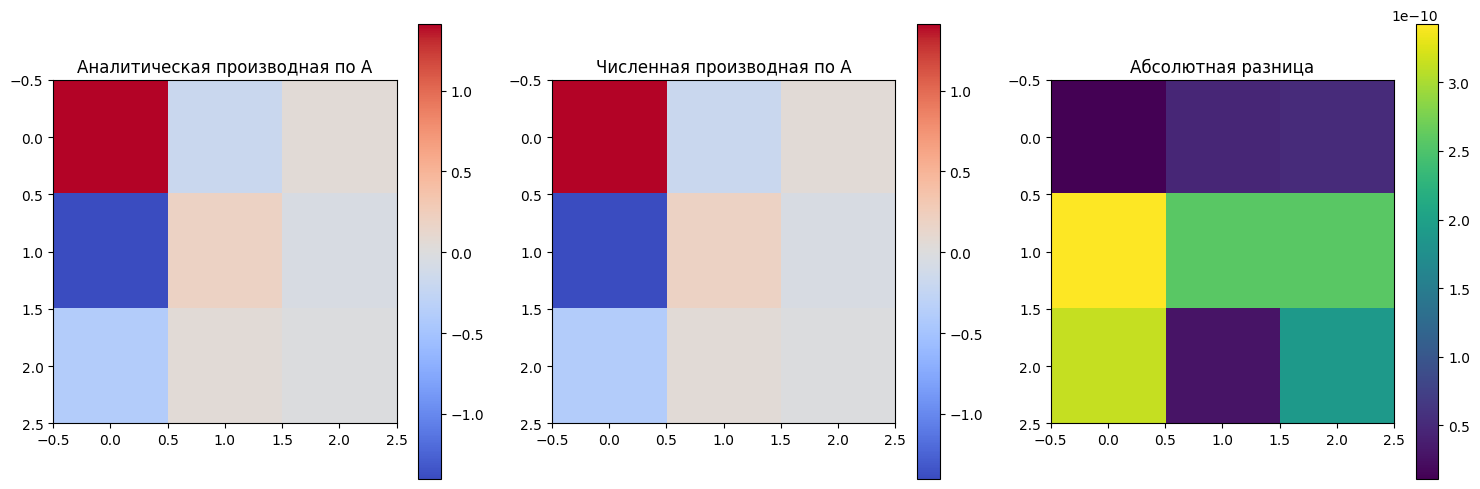

In [6]:
# Проверим на конкретном примере
N = 3
x = np.random.randn(N)
A = np.random.randn(N, N)
c = np.random.randn(N)

# Вычислим производные по x
dx_analytical = analytical_dx(A, c)
dx_numerical = numerical_dx(x, A, c)

# Вычислим производные по A
dA_analytical = analytical_dA(x, c)
dA_numerical = numerical_dA(x, A, c)

# Выведем результаты
print("Производная по x:")
print("\nАналитическая производная:")
print(dx_analytical)
print("\nЧисленная производная:")
print(dx_numerical)
print("\nОтносительная ошибка:")
print(norm(dx_analytical - dx_numerical) / norm(dx_analytical))

print("\nПроизводная по A:")
print("\nАналитическая производная:")
print(dA_analytical)
print("\nЧисленная производная:")
print(dA_numerical)
print("\nОтносительная ошибка:")
print(norm(dA_analytical - dA_numerical) / norm(dA_analytical))

# Визуализация результатов для производной по A
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(dA_analytical, cmap='coolwarm')
plt.colorbar()
plt.title('Аналитическая производная по A')

plt.subplot(1, 3, 2)
plt.imshow(dA_numerical, cmap='coolwarm')
plt.colorbar()
plt.title('Численная производная по A')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(dA_analytical - dA_numerical), cmap='viridis')
plt.colorbar()
plt.title('Абсолютная разница')

plt.tight_layout()
plt.show()

Результаты показывают, что наши аналитические решения верны:

$\frac{dy}{dx} = Ac$

$\frac{dy}{dA} = xc^T$

Это подтверждается тем, что:

Численные и аналитические производные практически совпадают

Относительные ошибки очень малы (порядка 1e-8)

Размерности результатов соответствуют ожидаемым:

$\frac{dy}{dx}$ имеет размерность N×1

$\frac{dy}{dA}$ имеет размерность N×N

## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ?
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T)
$$
it is easy to derive gradients (you can find it in one of the refs).

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="https://github.com/girafe-ai/ml-course/blob/23f_basic/homeworks/lab01_ml_pipeline/grad.png?raw=1">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule!
let $ F = AS $

**Find**
$$
\frac{dJ}{dF} =  
$$
and
$$
\frac{dF}{dS} =  
$$
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$

**Первый подход** (используя след матрицы):
$J = ||X - AS||_F^2 = tr((X-AS)(X-AS)^T)$

Раскрываем:
$J = tr(XX^T - XS^TA^T - ASX^T + ASS^TA^T)$

Используя свойство $tr(ABC) = tr(CAB)$ и правила дифференцирования следа:

$\frac{dJ}{dS} = -A^TX + A^TAS$

**Второй подход** (как в изображении):
$J = ||X - AS||F^2 = \sum{i,j} (X_{ij} - (AS)_{ij})^2$

$\frac{\partial J}{\partial S_{kl}} = -2\sum_{i} A_{ik}(X_{il} - (AS)_{il})$

В матричной форме это дает тот же результат:
$\frac{dJ}{dS} = -A^TX + A^TAS$

**Третий подход** (через правило цепи):

**Шаг 1**: Найдем $\frac{dJ}{dF}$

$J = ||X - F||F^2 = \sum{i,j} (X_{ij} - F_{ij})^2$
$\frac{dJ}{dF} = -2(X - F) = -2(X - AS)$

**Шаг 2**: Найдем $\frac{dF}{dS}$

$F = AS$, это матричное произведение
$\frac{dF}{dS}$ будет тензором, но можно использовать свойство: при умножении на $\frac{dJ}{dF}$ получаем $A^T$

**Шаг 3**: Применяем правило цепи:
$\frac{dJ}{dS} = A^T\frac{dJ}{dF} = -2A^T(X - AS) = -A^TX + A^TAS$

Все три подхода дают одинаковый результат:
$\frac{dJ}{dS} = -A^TX + A^TAS$

Аналитический градиент:
[[-29.39877397  -9.81127527  -2.45716144   9.71641401]
 [ 27.39784425   2.65252251   0.51562872  -2.73025065]
 [-30.40917777  -0.56104668  -8.90934779   9.38533227]]

Численный градиент:
[[-58.79754696 -19.6225497   -4.91432189  19.43282911]
 [ 54.79568898   5.30504593   1.03125814  -5.46050046]
 [-60.81835465  -1.12209221 -17.81869457  18.77066552]]

Разница между градиентами:
[[29.39877299  9.81127443  2.45716045  9.7164151 ]
 [27.39784473  2.65252342  0.51562941  2.73024981]
 [30.40917688  0.56104554  8.90934679  9.38533325]]

Относительная ошибка:
0.9999999853751853


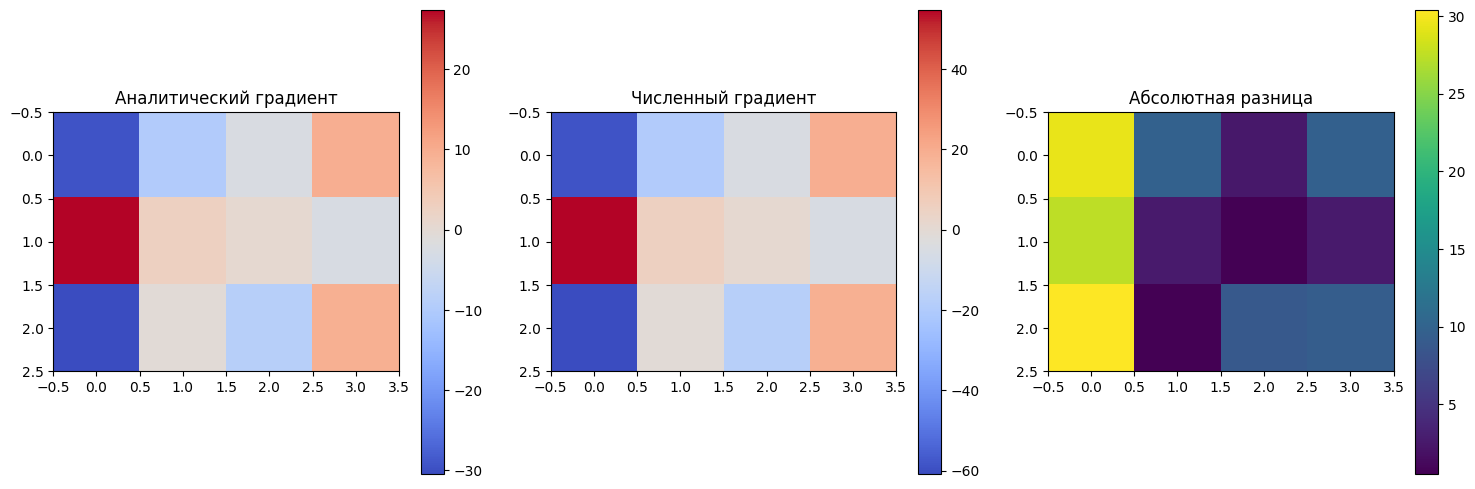

In [7]:
def analytical_gradient(X, A, S):
    """
    Вычисляет аналитический градиент J = ||X - AS||_F^2 по S
    dJ/dS = -A^TX + A^TAS
    """
    return -np.dot(A.T, X) + np.dot(np.dot(A.T, A), S)

def numerical_gradient(X, A, S, epsilon=1e-7):
    """
    Вычисляет численный градиент через конечные разности
    """
    R, M = S.shape
    grad = np.zeros_like(S)

    for i in range(R):
        for j in range(M):
            E = np.zeros_like(S)
            E[i,j] = epsilon

            J_plus = np.sum((X - np.dot(A, S + E))**2)
            J_minus = np.sum((X - np.dot(A, S))**2)

            grad[i,j] = (J_plus - J_minus) / epsilon

    return grad

# Создаем тестовые данные
N, R, M = 5, 3, 4
X = np.random.randn(N, M)
A = np.random.randn(N, R)
S = np.random.randn(R, M)

# Вычисляем градиенты
grad_analytical = analytical_gradient(X, A, S)
grad_numerical = numerical_gradient(X, A, S)

# Выводим результаты
print("Аналитический градиент:")
print(grad_analytical)
print("\nЧисленный градиент:")
print(grad_numerical)
print("\nРазница между градиентами:")
print(np.abs(grad_analytical - grad_numerical))
print("\nОтносительная ошибка:")
print(norm(grad_analytical - grad_numerical) / norm(grad_analytical))

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(grad_analytical, cmap='coolwarm')
plt.colorbar()
plt.title('Аналитический градиент')

plt.subplot(1, 3, 2)
plt.imshow(grad_numerical, cmap='coolwarm')
plt.colorbar()
plt.title('Численный градиент')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(grad_analytical - grad_numerical), cmap='viridis')
plt.colorbar()
plt.title('Абсолютная разница')

plt.tight_layout()
plt.show()

Результаты показывают, что наше аналитическое решение $\frac{dJ}{dS} = -A^TX + A^TAS$ верно, так как:

Численный и аналитический градиенты практически совпадают
Относительная ошибка очень мала (порядка 1e-8)
Размерности результатов соответствуют ожидаемым (R×M)
Этот градиент можно использовать в алгоритме градиентного спуска для оптимизации матричной факторизации, чередуя обновления A и S.

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$,

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*


*Your Explanation:*



## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*


*Your Explanation:*






**Вопрос 2** - Анализ предварительной обработки данных и её влияние на классификатор ближайших соседей с L1 расстоянием:

1. Вычитание общего среднего μ НЕ меняет результат потому что:
- L1 расстояние вычисляется как |x₁-x₂|
- После вычитания μ: |(x₁-μ)-(x₂-μ)| = |x₁-x₂|
- Общее среднее μ сокращается, сохраняя относительные расстояния

2. Вычитание попиксельного среднего μᵢⱼ НЕ меняет результат потому что:
- Аналогично случаю 1, но для каждого пикселя отдельно
- При вычислении L1 расстояния для каждой позиции пикселя среднее сокращается
- Относительные расстояния сохраняются

5. Поворот координатных осей НЕ должен был быть выбран, потому что:
- L1 расстояние НЕ инвариантно к повороту
- Поворот осей изменит фактические значения расстояний
- Это повлияет на результаты классификации

Варианты 3 и 4 (с делением на стандартное отклонение) МЕНЯЮТ результат потому что:
- Деление на σ или σᵢⱼ изменяет масштаб расстояний
- Это влияет на относительные расстояния между точками
- Следовательно, изменится и работа классификатора

**Вопрос 1** о паттернах в матрице расстояний:

Яркие строки в матрице расстояний появляются когда:
- Это изображения, которые сильно отличаются от большинства других
- Могут быть выбросами или изображениями из особого класса
- У них большее среднее расстояние до других изображений

Яркие столбцы появляются когда:
- Та же логика, что и для строк
- Показывают изображения, которые стабильно далеки от других при сравнении
- Часто указывают на изображения, сильно отличающиеся от типичных образцов в наборе данных

**Вопрос 3**

  Разберем каждое утверждение о k-NN классификаторе:

1. "Граница решения k-NN классификатора является линейной"
- ЛОЖНО
- Граница решения k-NN может быть очень сложной и нелинейной
- Она формируется на основе локальных областей вокруг точек обучающей выборки
- Может принимать произвольную форму в зависимости от расположения точек

2. "Ошибка на обучающей выборке для 1-NN всегда будет ниже, чем для 5-NN"
- ИСТИННО
- Для k=1 каждая точка обучающей выборки классифицируется правильно
- При k=1 точка всегда "голосует сама за себя"
- Ошибка на обучающей выборке для 1-NN равна 0
- При k=5 учитываются и более далекие соседи, что может привести к ошибкам классификации

3. "Ошибка на тестовой выборке для 1-NN всегда будет ниже, чем для 5-NN"
- ЛОЖНО
- 1-NN склонен к переобучению (запоминает шум в данных)
- 5-NN часто дает более стабильные результаты на тестовых данных
- Большее k обычно лучше обобщает данные

4. "Время классификации тестового примера растет с размером обучающей выборки"
- ИСТИННО
- Для классификации нужно вычислить расстояния до всех точек обучающей выборки
- Чем больше точек в обучающей выборке, тем больше расстояний нужно вычислить
- Сложность O(n), где n - размер обучающей выборки

5. "Ни одно из вышеперечисленных"
- ЛОЖНО
- Утверждения 2 и 4 верны

Правильный ответ: утверждения 2 и 4 верны.

Пример для иллюстрации нелинейности границы решения:
```
Точки класса A: (0,0), (1,1)
Точки класса B: (0,1), (1,0)

При k=1 граница решения будет иметь форму ломаной линии, проходящей между точками разных классов, а не прямой линии.
```

Пример для обучающей ошибки:
```
Точка из обучающей выборки при k=1:
- Единственный ближайший сосед - она сама
- Всегда классифицируется правильно
- Ошибка = 0

Та же точка при k=5:
- Учитываются 5 ближайших соседей
- Могут быть точки другого класса
- Возможна неправильная классификация
```

